In [1]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import regression

In [2]:
def loadDataSet(filename):
    """
    读取数据集
    :param filename: 数据文件路径
    :return: feature 数据矩阵，输出（房价）矩阵
    """
    # feature 个数，即原文件列数减一（其中一列为房价，即输出）
    numFeat = len(open(filename).readline().split('\t')) - 1
    X = []
    y = []
    file = open(filename)
    for line in file.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        X.append(lineArr)
        y.append(float(curLine[-1]))
    return np.mat(X), np.mat(y).T

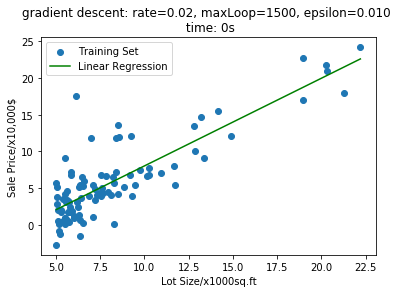

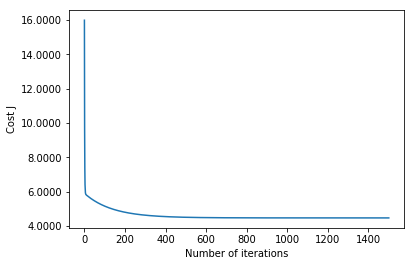

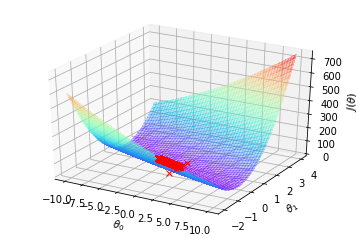

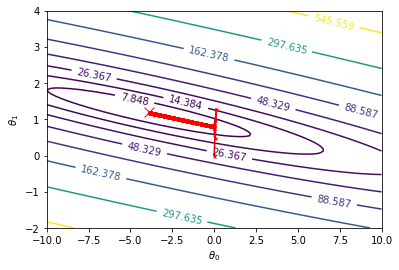

In [10]:
if __name__ == "__main__":
    # load data
    X, y = loadDataSet('data/house_price.txt');

    m,n = X.shape
    # add x0 as 1 for each feature
    X = np.concatenate((np.ones((m,1)), X), axis=1)

    # learing rate
    rate = 0.02
    # maximum number of iterations
    maxLoop = 1500
    # precision
    epsilon = 0.01
    
    result, timeConsumed = regression.gradientDescentOptimizer(rate, maxLoop, epsilon, (X), (y))
    theta, errors, thetas = result

    # plot predicted line
    fittingFig = plt.figure()
    title = 'gradient descent: rate=%.2f, maxLoop=%d, epsilon=%.3f \n time: %ds'%(rate,maxLoop,epsilon,timeConsumed)
    ax = fittingFig.add_subplot(111, title=title)
    trainingSet = ax.scatter(X[:, 1].flatten().A[0], y[:,0].flatten().A[0])

    xCopy = X.copy()
    xCopy.sort(0)
    yHat = xCopy*theta
    fittingLine, = ax.plot(xCopy[:,1], yHat, color='g')

    ax.set_xlabel('Lot Size/x1000sq.ft')
    ax.set_ylabel('Sale Price/x10,000$')

    plt.legend([trainingSet, fittingLine], ['Training Set', 'Linear Regression'])
    plt.show()

    # cost function
    errorsFig = plt.figure()
    ax = errorsFig.add_subplot(111)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.4f'))

    ax.plot(range(len(errors)), errors)
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('Cost J')

    plt.show()

    # 3D cost function
    size = 100
    theta0Vals = np.linspace(-10,10, size)
    theta1Vals = np.linspace(-2, 4, size)
    JVals = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            col = np.matrix([[theta0Vals[i]], [theta1Vals[j]]])
            JVals[i,j] = regression.J(col, X, y)

    theta0Vals, theta1Vals = np.meshgrid(theta0Vals, theta1Vals)
    JVals = JVals.T
    contourSurf = plt.figure()
    ax = contourSurf.gca(projection='3d')

    ax.plot_surface(theta0Vals, theta1Vals, JVals,  rstride=2, cstride=2, alpha=0.3,
                cmap=cm.rainbow, linewidth=0, antialiased=False)
    ax.plot(thetas[0], thetas[1], 'rx')
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    ax.set_zlabel(r'$J(\theta)$')

    plt.show()

    contourFig = plt.figure()
    ax = contourFig.add_subplot(111)
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')

    CS = ax.contour(theta0Vals, theta1Vals, JVals, np.logspace(-2,3,20))
    plt.clabel(CS, inline=1, fontsize=10)

    ax.plot(theta[0,0], theta[1,0], 'rx', markersize=10, linewidth=2)

    ax.plot(thetas[0], thetas[1], 'rx', markersize=3, linewidth=1)
    ax.plot(thetas[0], thetas[1], 'r-')

    plt.show()